# 2020.12.18、2021.1.14に取得したデータを分析する

## 12/25MTG時のToDo
* ~~URL送る　https://www.anaconda.com/products/individual#Downloads~~
* 反転時の摩擦係数の急上昇 くさび効果
* クリームの吐き出されやすさが速度依存 : 反転時の摩擦係数の急上昇（周期成分）の極大値から吐き出されやすさを推定できる？
* 速度に対する摩擦係数を取る　周期ごとに分解
* 極大値に位相ズレがないか確認する
* ディリクレ核で反転時における急激な摩擦係数の上昇成分を抜き出す
* ~~測定開始直後と最後のデータは抜く~~

## その他思いついたToDo(優先度低)
* GitHubにpushして共有→所内ネットワークからアクセスできるか確認
* 使い方マニュアル作る
* パッケージ化してGitHubに上げる

In [50]:
#### Variables
# Files
v_path_conditions_201218 = 'Data/20201218_condition.csv'
v_path_conditions_210114 = 'Data/20210114_condition.csv'
v_range_rawData_sin = 0.2
v_range_rawData_square = 2.0
# v_range_absData = 1.5
v_range_dcp_sin = [0.2, 0.1, 0.1, 0.2]
v_range_dcp_square = [2.0, 1.0, 1.0, 2.0]

In [51]:
### Import libraries
import io 
import sys
import pandas as pd
import numpy as np
import requests
import statsmodels.api as sm

#### Visualize related libraries
from matplotlib import pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#### Self-defined module
sys.path.append('C:/Users/90033353/GoogleDrive_Nagi/Friction')
from frictionData import FrictionData

In [52]:
# Condition
v_data_conditions_201218 = pd.read_csv(v_path_conditions_201218, index_col=0, skiprows=1)
v_data_conditions_210114 = pd.read_csv(v_path_conditions_210114, index_col=0, skiprows=1)
v_data_conditions = pd.concat([v_data_conditions_201218, v_data_conditions_210114])
# v_data_conditions

In [53]:
# creamA_1mmps
v_inst_creamA_1mmps = FrictionData('creamA_1mmps', v_data_conditions)
# creamA_0mmps
v_inst_creamA_10mmps = FrictionData('creamA_10mmps', v_data_conditions)
# creamA_40mmps
v_inst_creamA_40mmps = FrictionData('creamA_40mmps', v_data_conditions)


# creamB_1mmps
v_inst_creamB_1mmps = FrictionData('creamB_1mmps', v_data_conditions)
# creamB_0mmps
v_inst_creamB_10mmps = FrictionData('creamB_10mmps', v_data_conditions)
# creamB_40mmps
v_inst_creamB_40mmps = FrictionData('creamB_40mmps', v_data_conditions)

# creamA_1mmps_N01
v_inst_creamA_1mmps_N01 = FrictionData('chifure-1mm-N=_01', v_data_conditions)
# creamA_1mmps_N02
v_inst_creamA_1mmps_N02 = FrictionData('chifure-1mm-N=_02', v_data_conditions)
# creamA_1mmps_N03
v_inst_creamA_1mmps_N03 = FrictionData('chifure-1mm-N=_03', v_data_conditions)

# creamA_10mmps_N01
v_inst_creamA_10mmps_N01 = FrictionData('chifure-10mm-N=_01', v_data_conditions)
# creamA_10mmps_N02
v_inst_creamA_10mmps_N02 = FrictionData('chifure-10mm-N=_02', v_data_conditions)
# creamA_10mmps_N03
v_inst_creamA_10mmps_N03 = FrictionData('chifure-10mm-N=_03', v_data_conditions)

# creamA_40mps_L40_N01
v_inst_creamA_40mmps_L40_N01 = FrictionData('chifure-40mm-L40-N=_01', v_data_conditions)
# creamA_40mps_L40_N02
v_inst_creamA_40mmps_L40_N02 = FrictionData('chifure-40mm-L40-N=_02', v_data_conditions)
# creamA_40mps_L40_N03
v_inst_creamA_40mmps_L40_N03 = FrictionData('chifure-40mm-L40-N=_03', v_data_conditions)

# creamA_40mmps_N01
v_inst_creamA_40mmps_N01 = FrictionData('chifure-40mm-N=_01', v_data_conditions)
# creamA_40mmps_N02
v_inst_creamA_40mmps_N02 = FrictionData('chifure-40mm-N=_02', v_data_conditions)
# creamA_40mmps_N03
v_inst_creamA_40mmps_N03 = FrictionData('chifure-40mm-N=_03', v_data_conditions)


# creamA_1mmps_N01
v_inst_creamB_1mmps_N01 = FrictionData('DLab-1mm-N=_01', v_data_conditions)
# creamA_1mmps_N02
v_inst_creamB_1mmps_N02 = FrictionData('DLab-1mm-N=_02', v_data_conditions)
# creamA_1mmps_N03
v_inst_creamB_1mmps_N03 = FrictionData('DLab-1mm-N=_03', v_data_conditions)

# creamA_10mmps_N01
v_inst_creamB_10mmps_N01 = FrictionData('DLab-10mm-N=_01', v_data_conditions)
# creamA_10mmps_N02
v_inst_creamB_10mmps_N02 = FrictionData('DLab-10mm-N=_02', v_data_conditions)
# creamA_10mmps_N03
v_inst_creamB_10mmps_N03 = FrictionData('DLab-10mm-N=_03', v_data_conditions)

# creamA_40mps_L40_N01
v_inst_creamB_40mmps_L40_N01 = FrictionData('DLab-40mm-L40-N=_01', v_data_conditions)
# creamA_40mps_L40_N02
v_inst_creamB_40mmps_L40_N02 = FrictionData('DLab-40mm-L40-N=_02', v_data_conditions)
# creamA_40mps_L40_N03
v_inst_creamB_40mmps_L40_N03 = FrictionData('DLab-40mm-L40-N=_03', v_data_conditions)

# creamA_40mmps_N01
v_inst_creamB_40mmps_N01 = FrictionData('DLab-40mm-N=_01', v_data_conditions)
# creamA_40mmps_N02
v_inst_creamB_40mmps_N02 = FrictionData('DLab-40mm-N=_02', v_data_conditions)
# creamA_40mmps_N03
v_inst_creamB_40mmps_N03 = FrictionData('DLab-40mm-N=_03', v_data_conditions)

In [54]:
v_inst_creamA_1mmps.data.describe()

,time,friction,displacement,pre1,frictionCoefficient,abs_frictionCoefficient
count,400072.000000,400072.000000,400072.000000,400072.0,400072.000000,400072.000000
mean,200135.500000,-0.606973,0.171098,0.0,-0.006070,0.052464
std,115490.982784,5.523666,7.028149,0.0,0.055237,0.018314
min,100.000000,-15.289310,-9.793091,0.0,-0.152893,0.000000
25%,100117.750000,-5.493164,-6.878662,0.0,-0.054932,0.040894
50%,200135.500000,-0.823975,0.109863,0.0,-0.008240,0.050049
75%,300153.250000,4.455566,7.235718,0.0,0.044556,0.060730
max,400171.000000,12.451170,10.253910,0.0,0.124512,0.152893


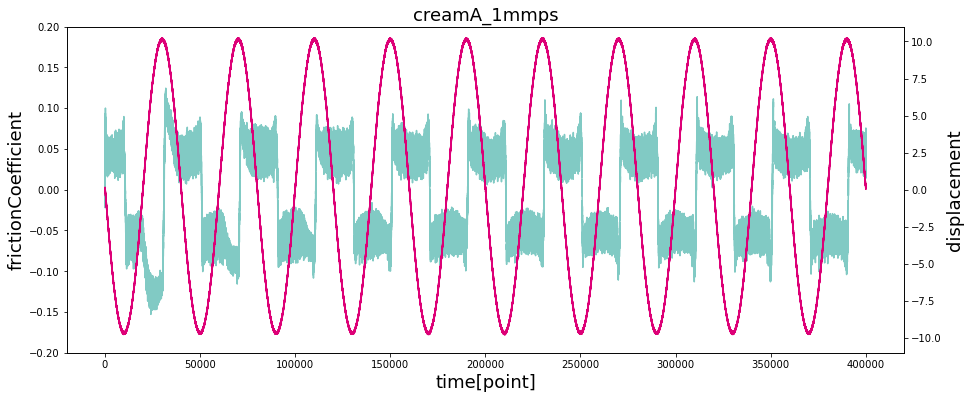

In [55]:
v_inst_creamA_1mmps.plot_rawData(v_range_rawData_sin)

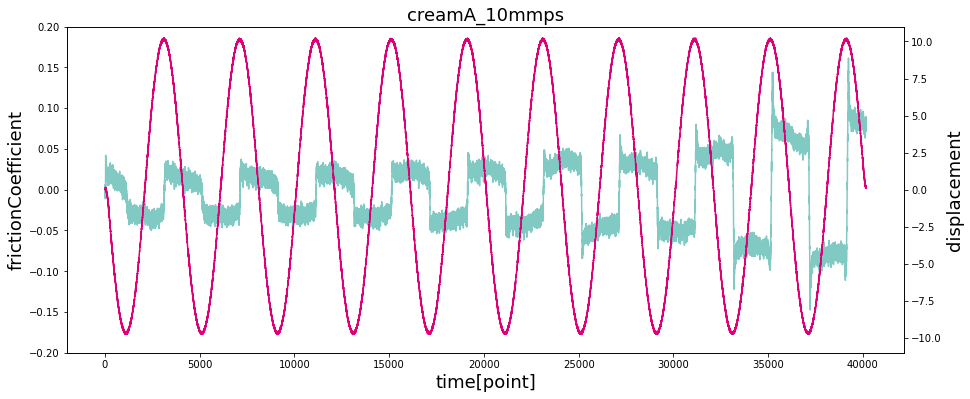

In [56]:
v_inst_creamA_10mmps.plot_rawData(v_range_rawData_sin)

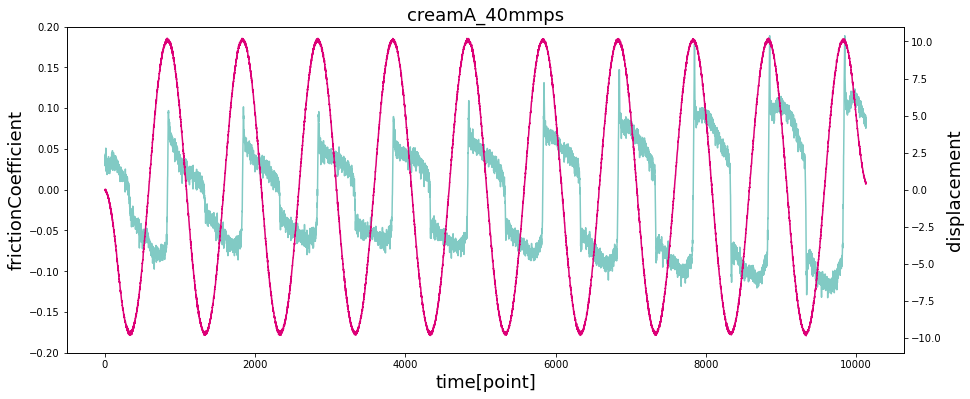

In [57]:
v_inst_creamA_40mmps.plot_rawData(v_range_rawData_sin)

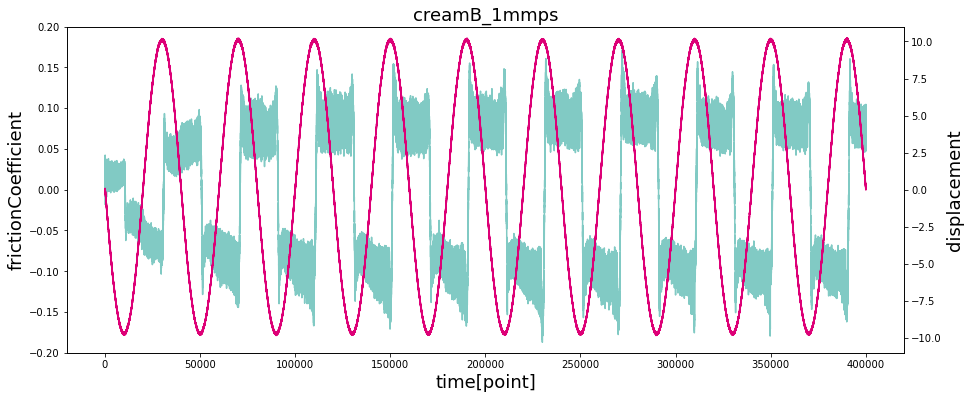

In [58]:
v_inst_creamB_1mmps.plot_rawData(v_range_rawData_sin)

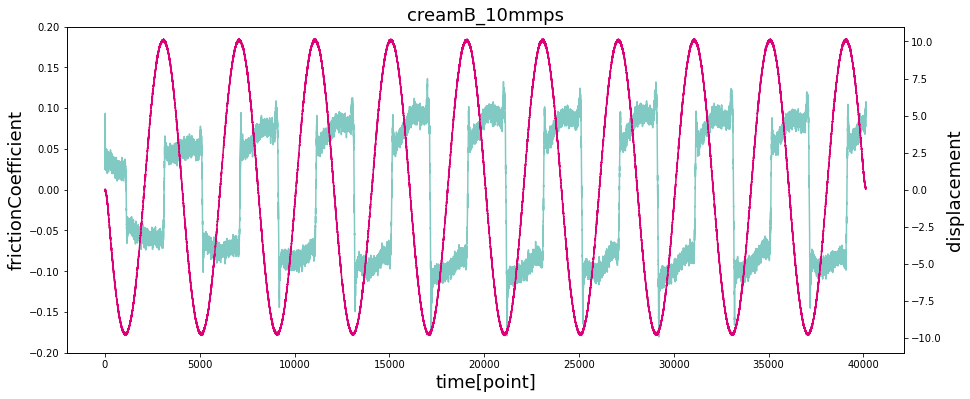

In [59]:
v_inst_creamB_10mmps.plot_rawData(v_range_rawData_sin)

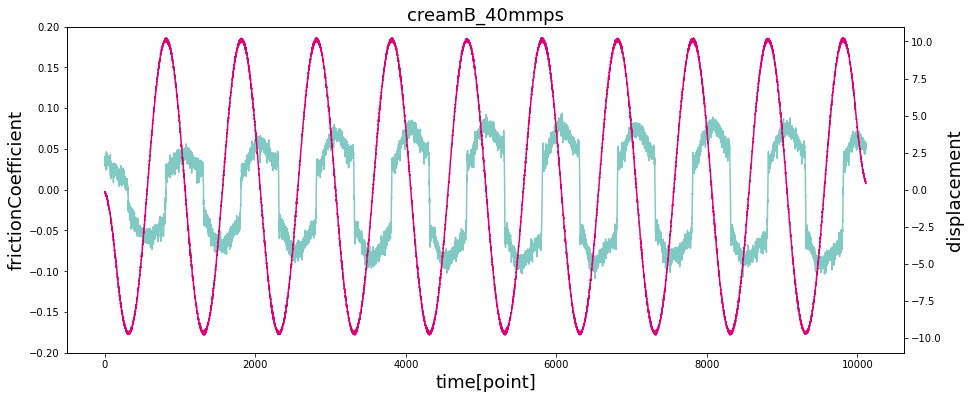

In [60]:
v_inst_creamB_40mmps.plot_rawData(v_range_rawData_sin)

In [61]:
v_inst_creamA_1mmps_N01.data.describe()

,time,friction,pre1,pre2,frictionCoefficient,abs_frictionCoefficient
count,403712.000000,403712.000000,403712.0,403712.0,403712.000000,403712.000000
mean,201955.500000,-4.868773,0.0,0.0,-0.048688,0.421004
std,116541.760274,48.194573,0.0,0.0,0.481946,0.239578
min,100.000000,-108.367900,0.0,0.0,-1.083679,0.000000
25%,101027.750000,-40.191650,0.0,0.0,-0.401917,0.232849
50%,201955.500000,-5.249023,0.0,0.0,-0.052490,0.361938
75%,302883.250000,30.242920,0.0,0.0,0.302429,0.571289
max,403811.000000,124.115000,0.0,0.0,1.241150,1.241150


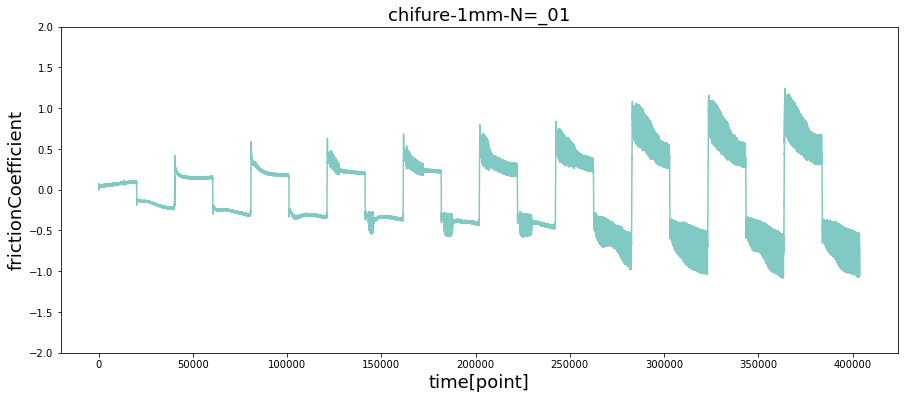

In [62]:
v_inst_creamA_1mmps_N01.plot_rawData(v_range_rawData_square)

In [63]:
# creamA_1mmps_N02
v_inst_creamA_1mmps_N02 = FrictionData('chifure-1mm-N=_02', v_data_conditions)
v_inst_creamA_1mmps_N02.data.describe()

,time,friction,pre1,pre2,frictionCoefficient,abs_frictionCoefficient
count,403704.000000,403704.000000,403704.0,403704.0,403704.000000,403704.000000
mean,201951.500000,-5.536283,0.0,0.0,-0.055363,0.346327
std,116539.450873,40.540996,0.0,0.0,0.405410,0.217899
min,100.000000,-106.658900,0.0,0.0,-1.066589,0.000000
25%,101025.750000,-34.667970,0.0,0.0,-0.346680,0.196228
50%,201951.500000,-6.896973,0.0,0.0,-0.068970,0.291443
75%,302877.250000,21.789550,0.0,0.0,0.217895,0.442505
max,403803.000000,117.858900,0.0,0.0,1.178589,1.178589


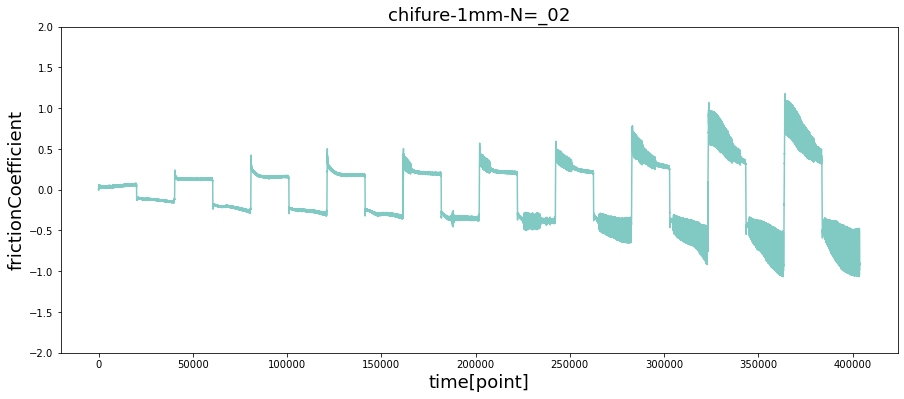

In [64]:
v_inst_creamA_1mmps_N02.plot_rawData(v_range_rawData_square)

In [65]:
# creamA_1mmps_N03
v_inst_creamA_1mmps_N03 = FrictionData('chifure-1mm-N=_03', v_data_conditions)
v_inst_creamA_1mmps_N03.data.describe()

,time,friction,pre1,pre2,frictionCoefficient,abs_frictionCoefficient
count,403728.000000,403728.000000,403728.0,403728.0,403728.000000,403728.000000
mean,201963.500000,-3.702808,0.0,0.0,-0.037028,0.171041
std,116546.379076,18.538390,0.0,0.0,0.185384,0.080518
min,100.000000,-41.473390,0.0,0.0,-0.414734,0.000000
25%,101031.750000,-20.812990,0.0,0.0,-0.208130,0.112305
50%,201963.500000,-0.305176,0.0,0.0,-0.003052,0.165710
75%,302895.250000,13.549800,0.0,0.0,0.135498,0.221558
max,403827.000000,48.034670,0.0,0.0,0.480347,0.480347


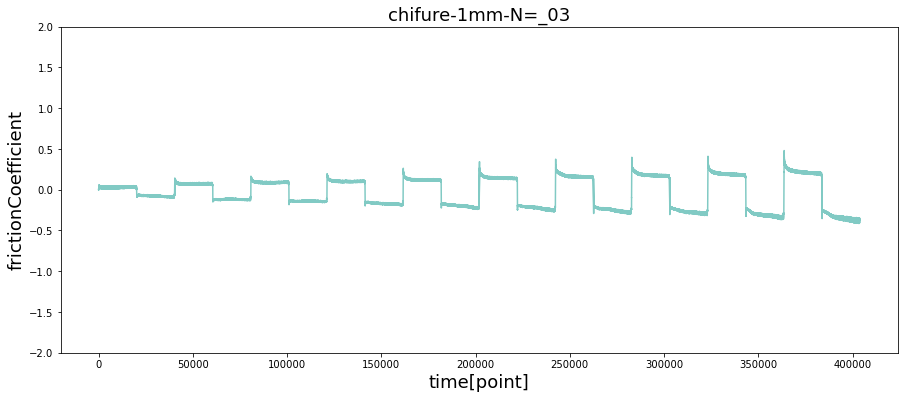

In [66]:
v_inst_creamA_1mmps_N03.plot_rawData(v_range_rawData_square)

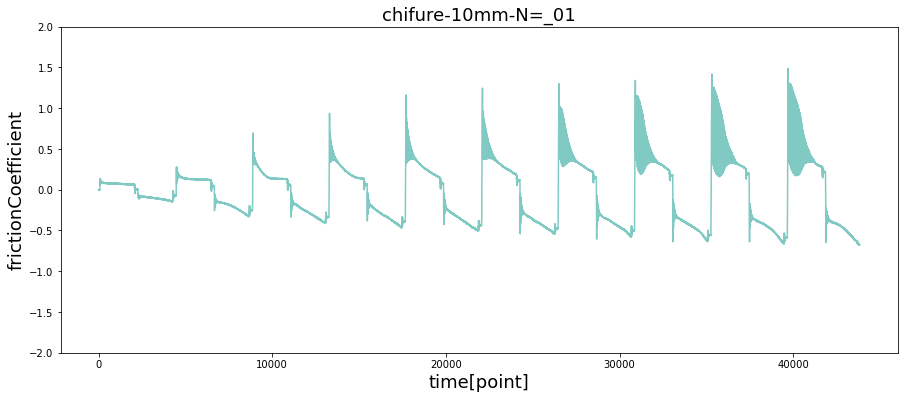

In [67]:
v_inst_creamA_10mmps_N01.plot_rawData(v_range_rawData_square)

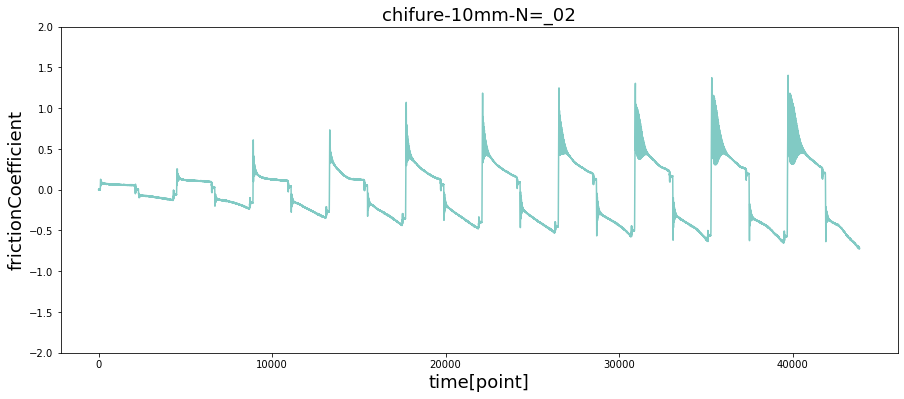

In [68]:
v_inst_creamA_10mmps_N02.plot_rawData(v_range_rawData_square)

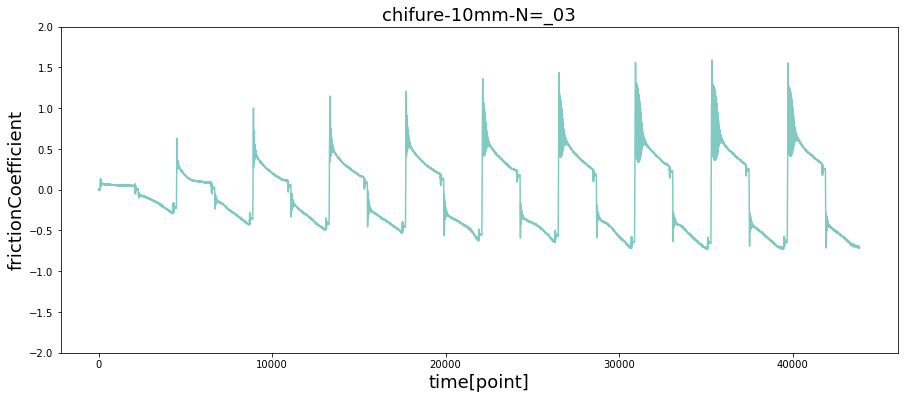

In [69]:
v_inst_creamA_10mmps_N03.plot_rawData(v_range_rawData_square)

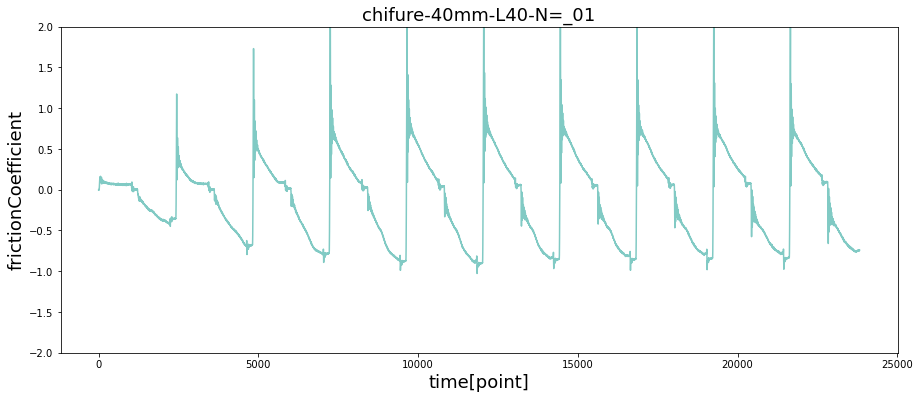

In [70]:
v_inst_creamA_40mmps_L40_N01.plot_rawData(v_range_rawData_square)

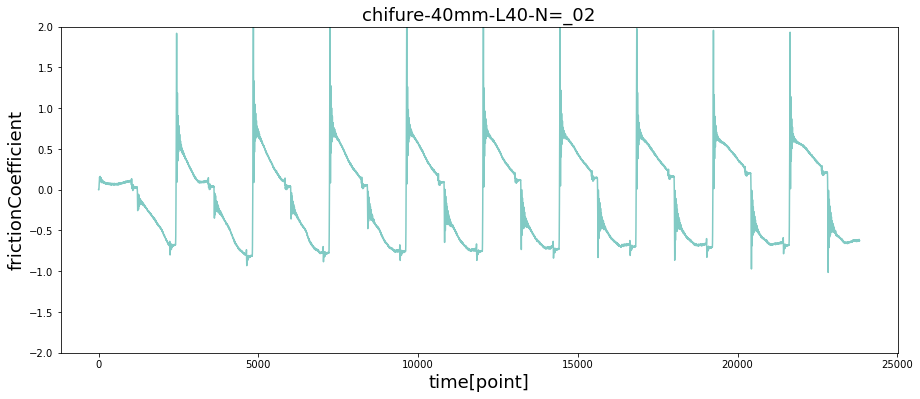

In [71]:
v_inst_creamA_40mmps_L40_N02.plot_rawData(v_range_rawData_square)

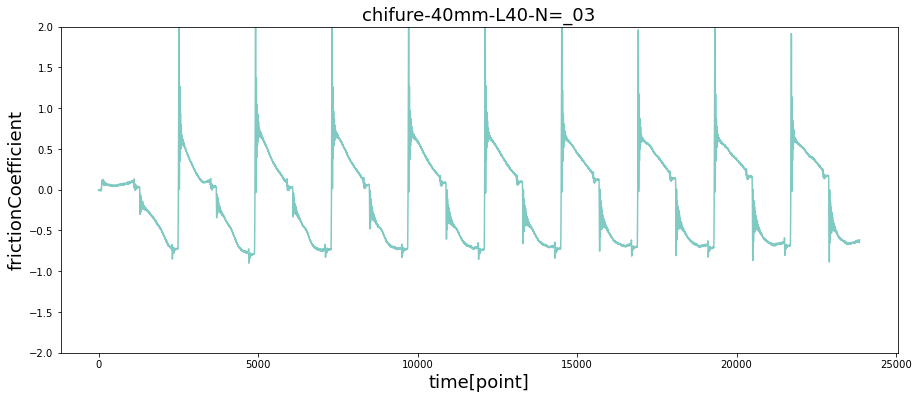

In [72]:
v_inst_creamA_40mmps_L40_N03.plot_rawData(v_range_rawData_square)

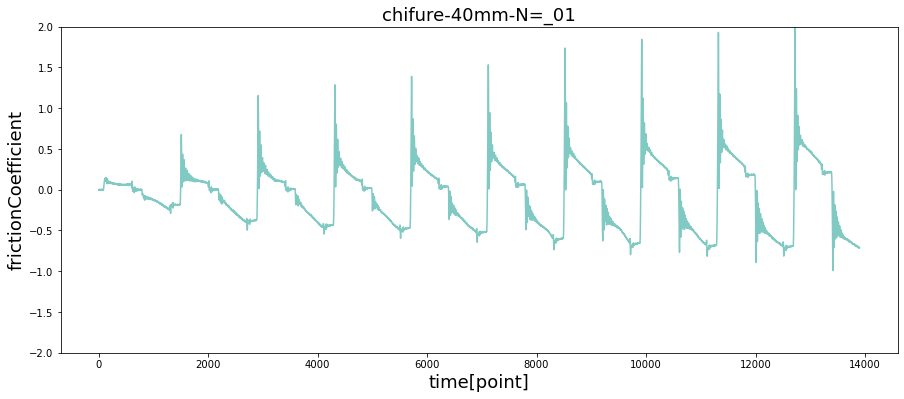

In [73]:
v_inst_creamA_40mmps_N01.plot_rawData(v_range_rawData_square)

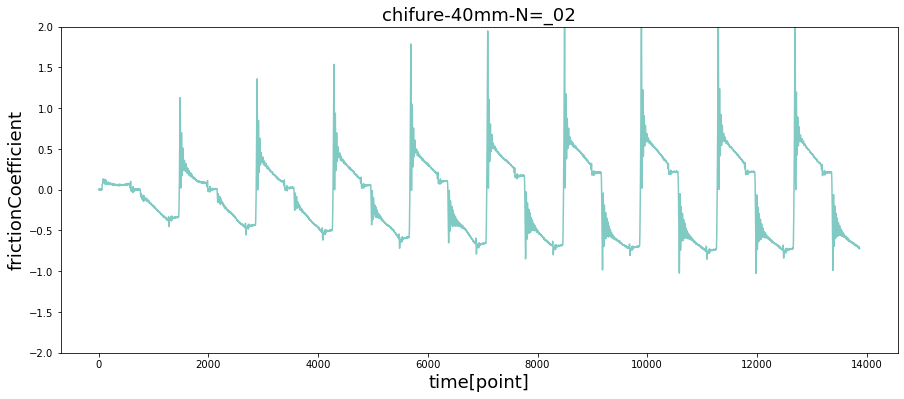

In [74]:
v_inst_creamA_40mmps_N02.plot_rawData(v_range_rawData_square)

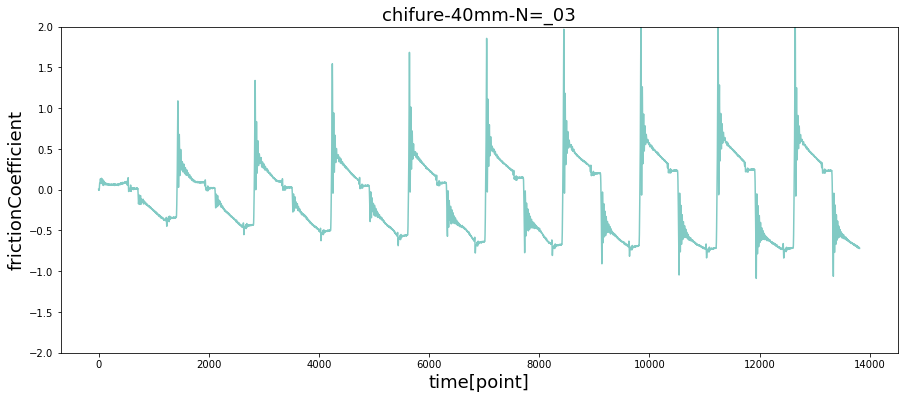

In [75]:
v_inst_creamA_40mmps_N03.plot_rawData(v_range_rawData_square)

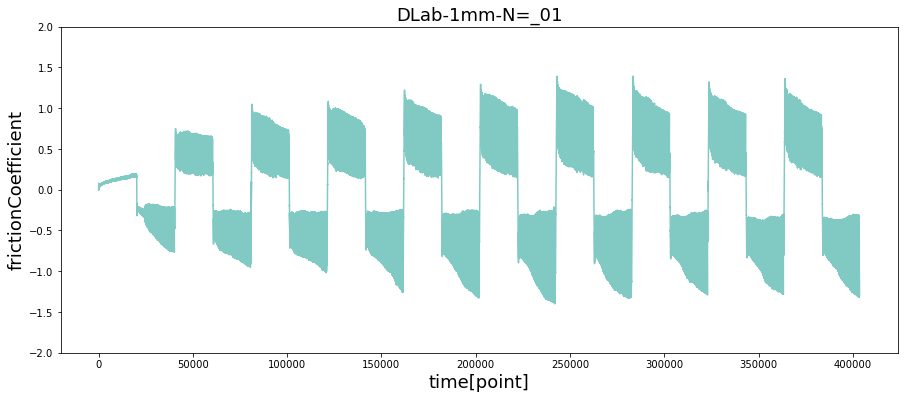

In [76]:
v_inst_creamB_1mmps_N01.plot_rawData(v_range_rawData_square)

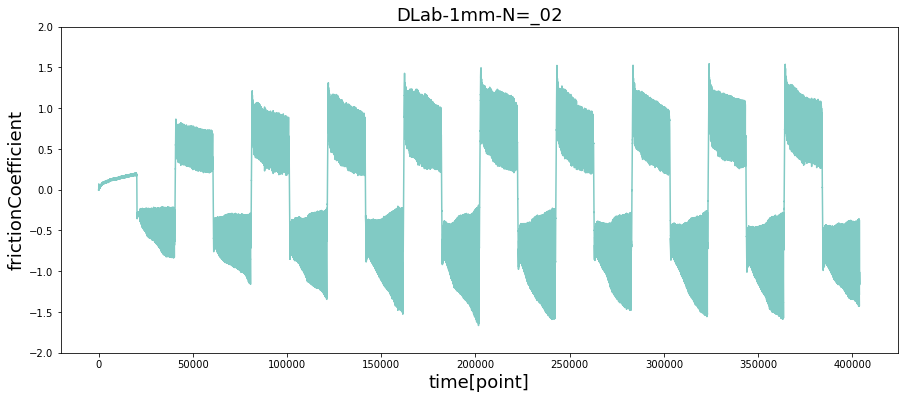

In [77]:
v_inst_creamB_1mmps_N02.plot_rawData(v_range_rawData_square)

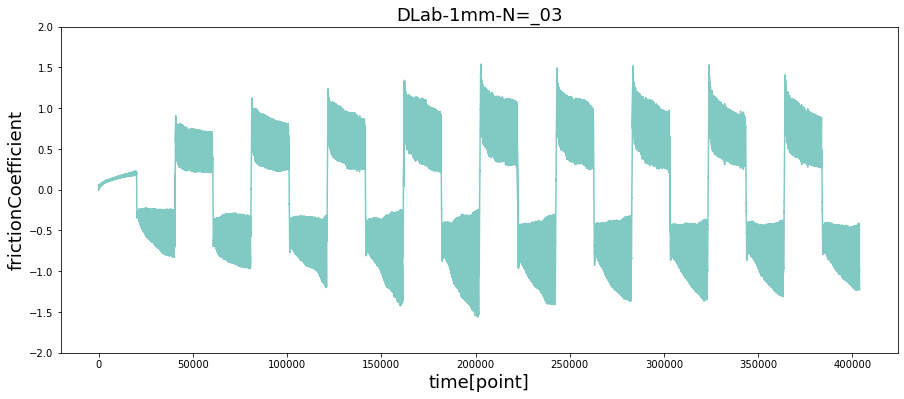

In [78]:
v_inst_creamB_1mmps_N03.plot_rawData(v_range_rawData_square)

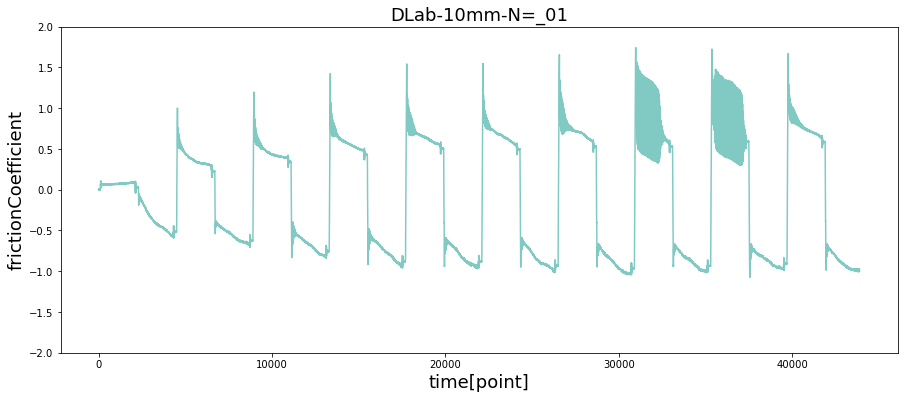

In [79]:
v_inst_creamB_10mmps_N01.plot_rawData(v_range_rawData_square)

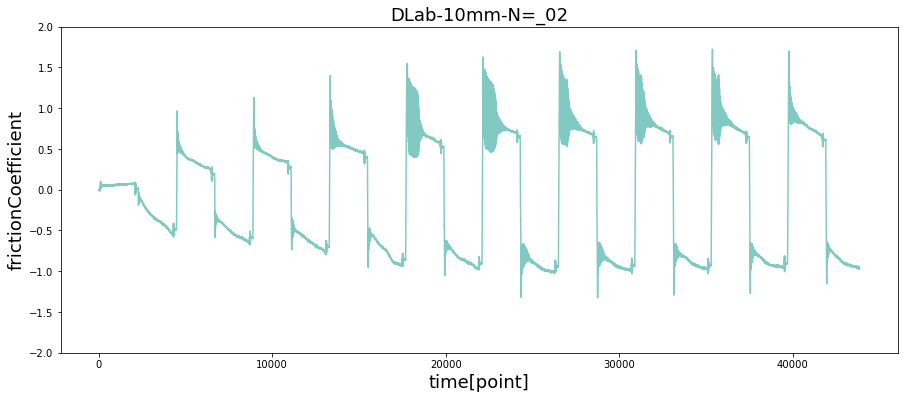

In [80]:
v_inst_creamB_10mmps_N02.plot_rawData(v_range_rawData_square)

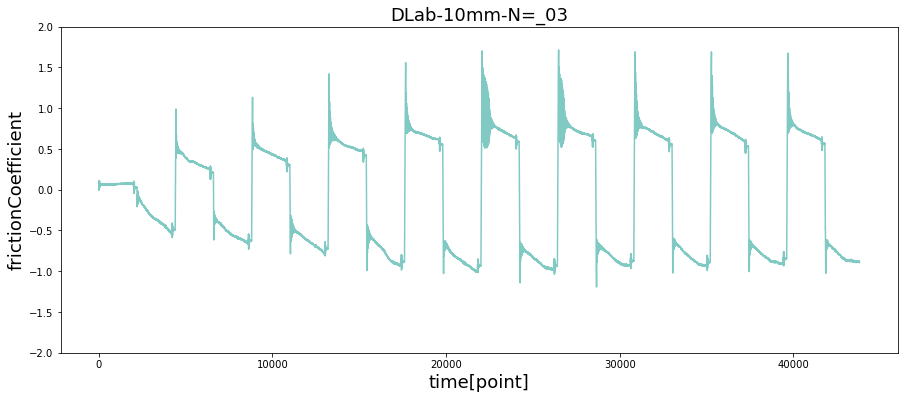

In [81]:
v_inst_creamB_10mmps_N03.plot_rawData(v_range_rawData_square)

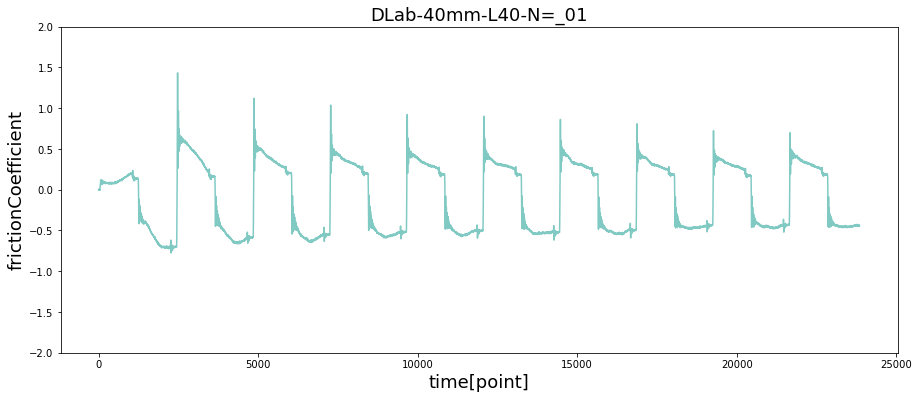

In [82]:
v_inst_creamB_40mmps_L40_N01.plot_rawData(v_range_rawData_square)

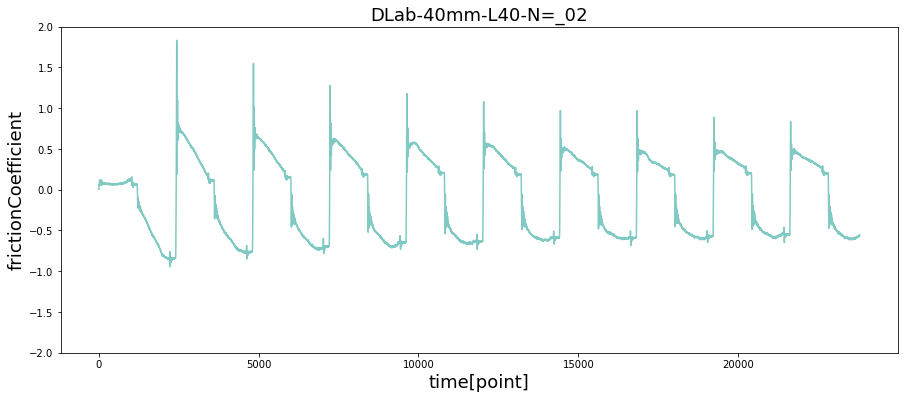

In [83]:
v_inst_creamB_40mmps_L40_N02.plot_rawData(v_range_rawData_square)

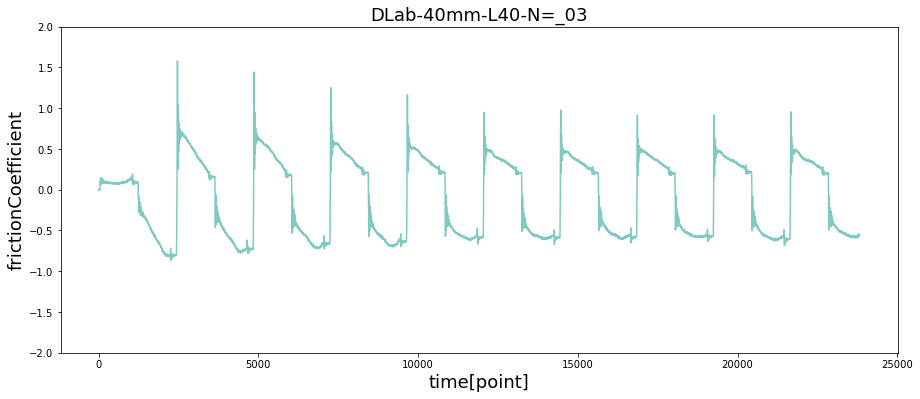

In [84]:
v_inst_creamB_40mmps_L40_N03.plot_rawData(v_range_rawData_square)

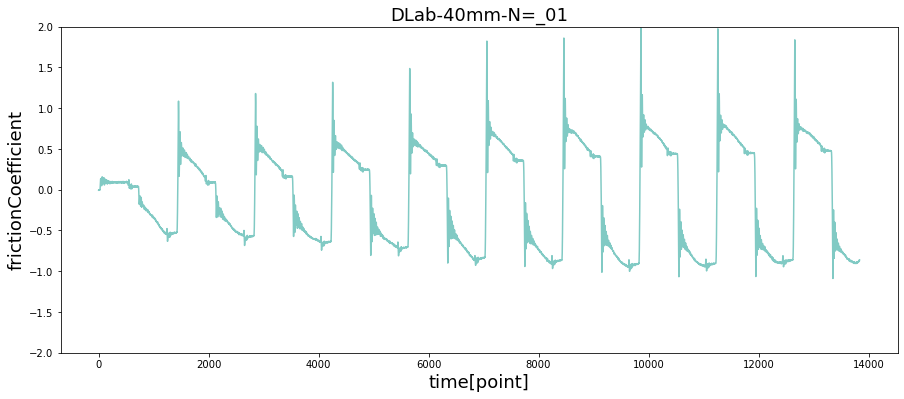

In [85]:
v_inst_creamB_40mmps_N01.plot_rawData(v_range_rawData_square)

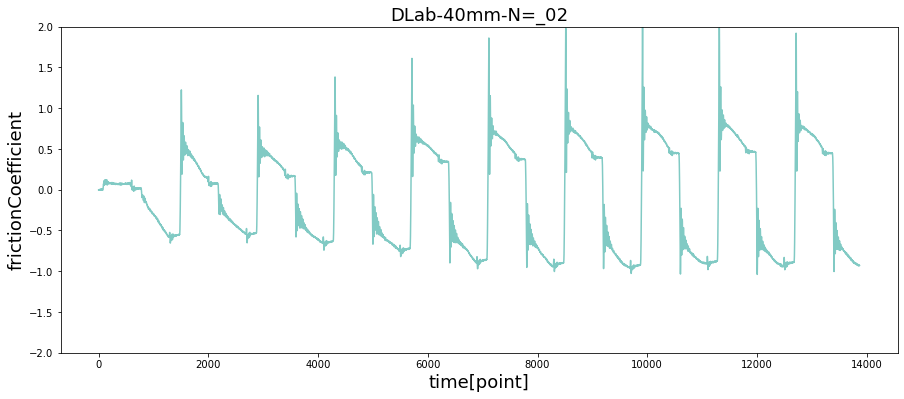

In [86]:
v_inst_creamB_40mmps_N02.plot_rawData(v_range_rawData_square)

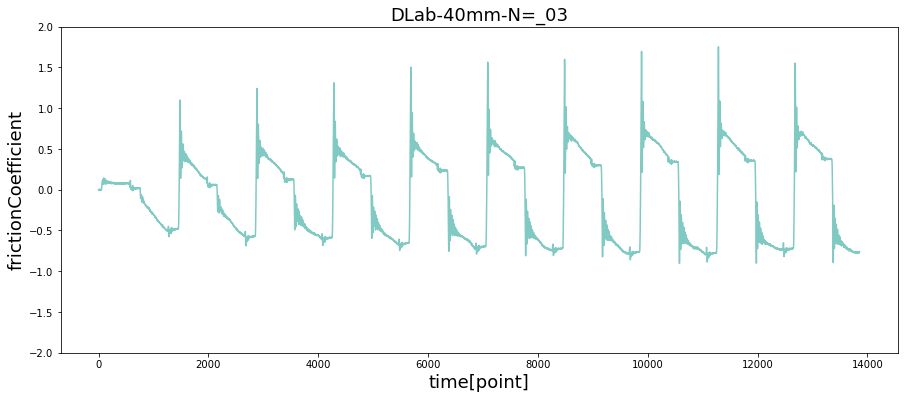

In [87]:
v_inst_creamB_40mmps_N03.plot_rawData(v_range_rawData_square)

In [88]:
#### View each mean and std
# info = pd.DataFrame(names=['name', 'mean', 'std'])

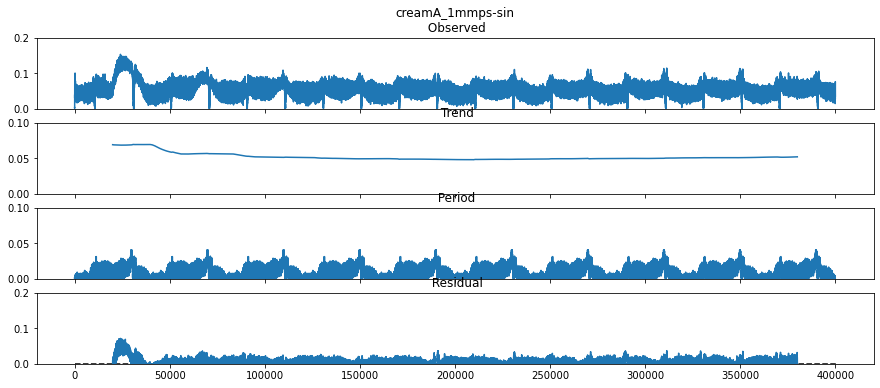

In [89]:
# creamA_1mmps
v_inst_creamA_1mmps.decompose_abs(v_range_dcp_sin)

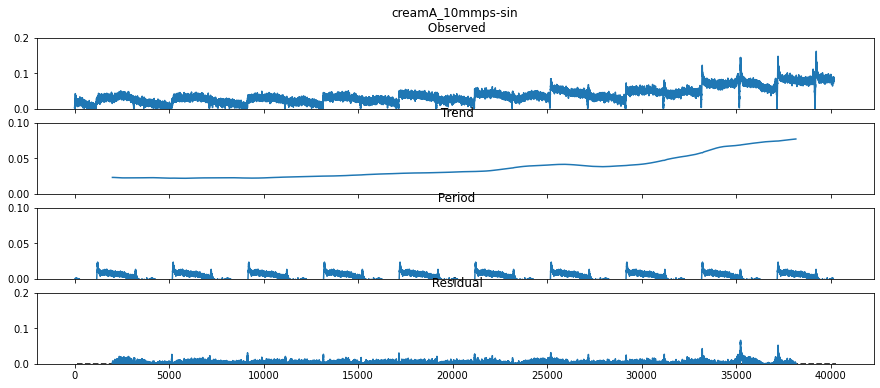

In [90]:
# creamA_10mmps
v_inst_creamA_10mmps.decompose_abs(v_range_dcp_sin)

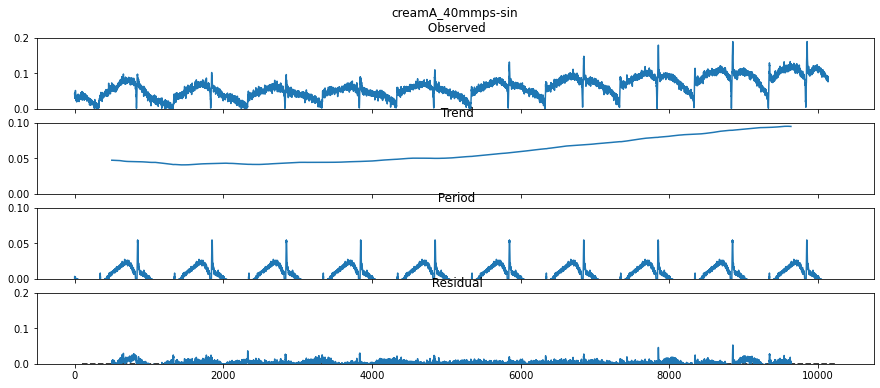

In [91]:
# creamA_40mmps
v_inst_creamA_40mmps.decompose_abs(v_range_dcp_sin)

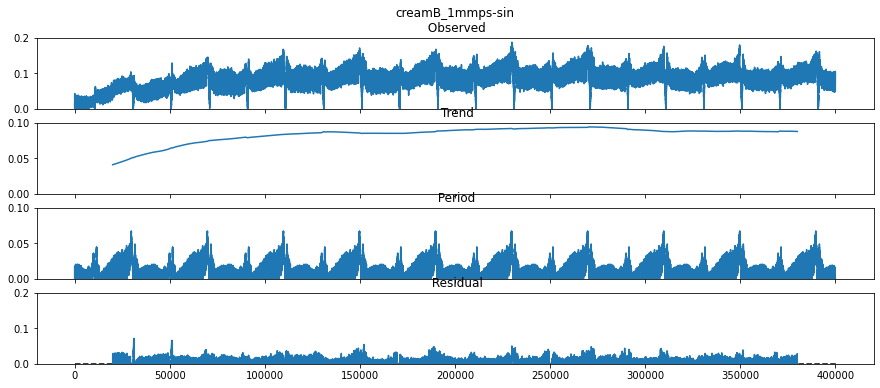

In [92]:
# creamB_1mmps
v_inst_creamB_1mmps.decompose_abs(v_range_dcp_sin)

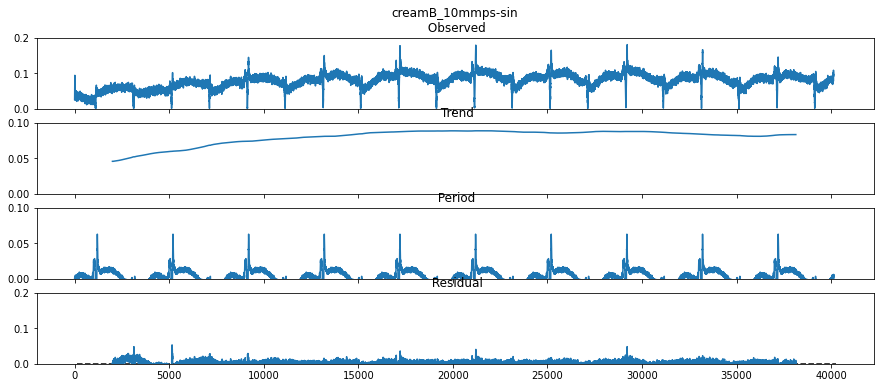

In [93]:
# creamB_10mmps
v_inst_creamB_10mmps.decompose_abs(v_range_dcp_sin)

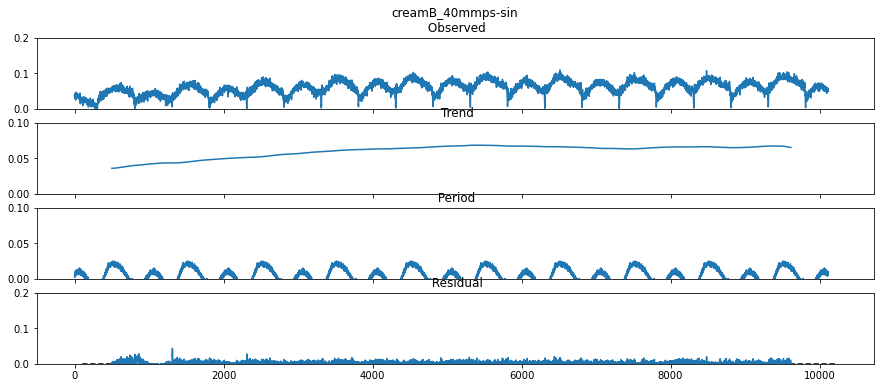

In [94]:
# creamB_40mmps
v_inst_creamB_40mmps.decompose_abs(v_range_dcp_sin)

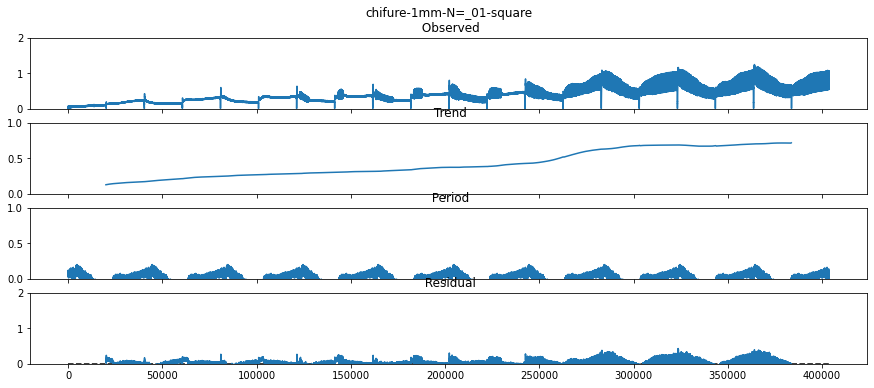

In [95]:
# creamA_1mmps_N01
v_inst_creamA_1mmps_N01.decompose_abs(v_range_dcp_square)

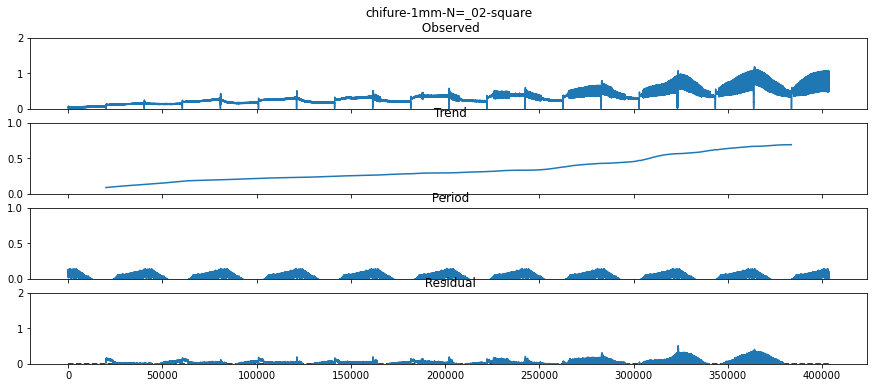

In [96]:
# creamA_1mmps_N02
v_inst_creamA_1mmps_N02.decompose_abs(v_range_dcp_square)

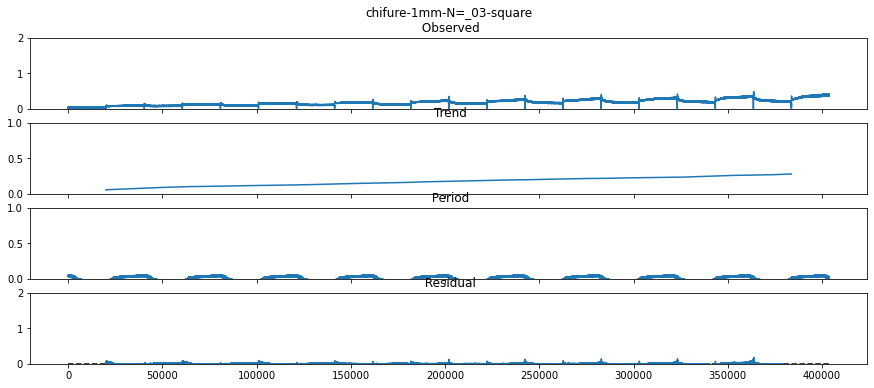

In [97]:
# creamA_1mmps_N03
v_inst_creamA_1mmps_N03.decompose_abs(v_range_dcp_square)

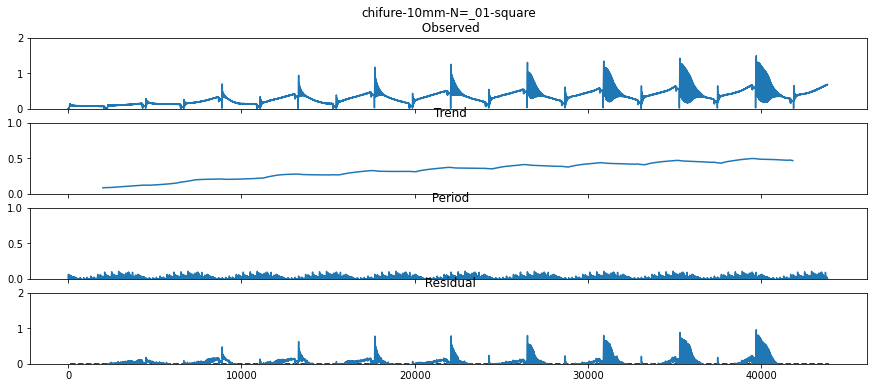

In [98]:
# creamA_10mmps_N01
v_inst_creamA_10mmps_N01.decompose_abs(v_range_dcp_square)

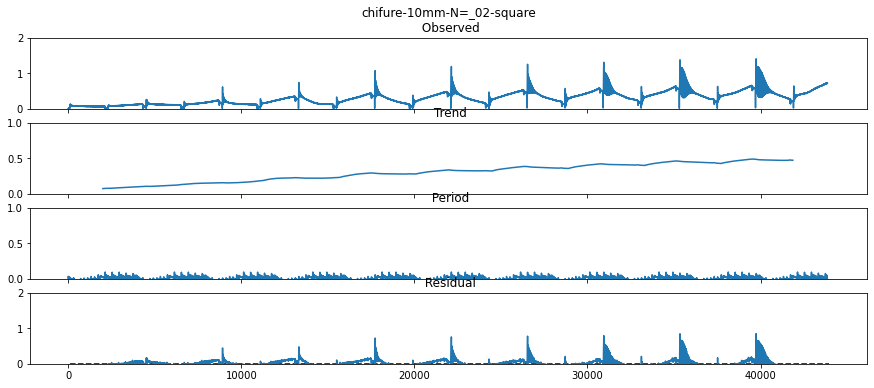

In [99]:
# creamA_10mmps_N02
v_inst_creamA_10mmps_N02.decompose_abs(v_range_dcp_square)

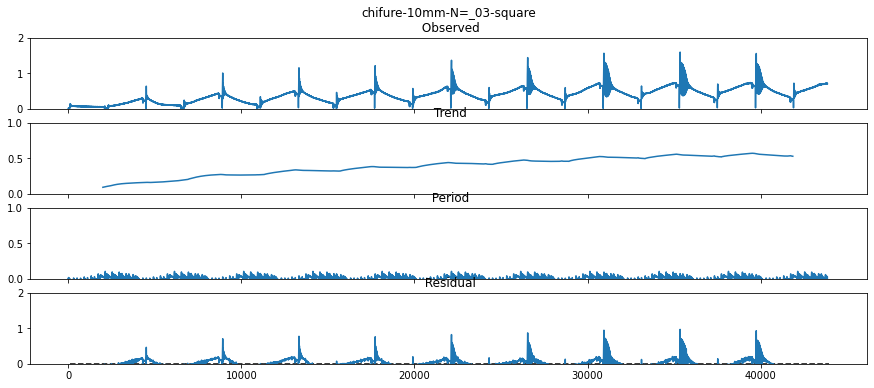

In [100]:
# creamA_10mmps_N03
v_inst_creamA_10mmps_N03.decompose_abs(v_range_dcp_square)

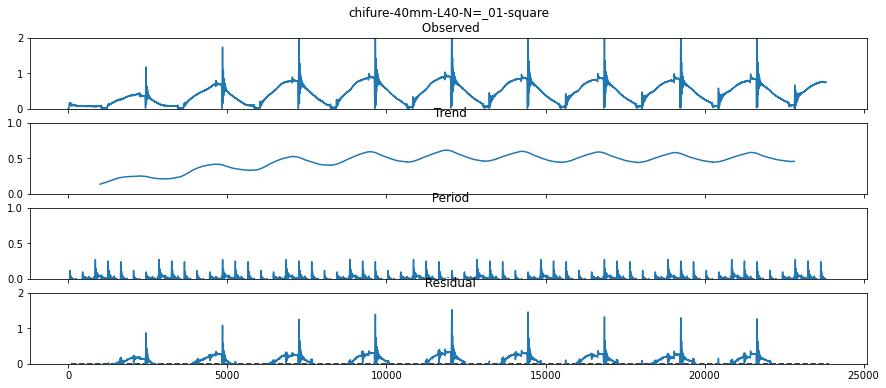

In [101]:
# creamA_40mmps_L40_N01
v_inst_creamA_40mmps_L40_N01.decompose_abs(v_range_dcp_square)

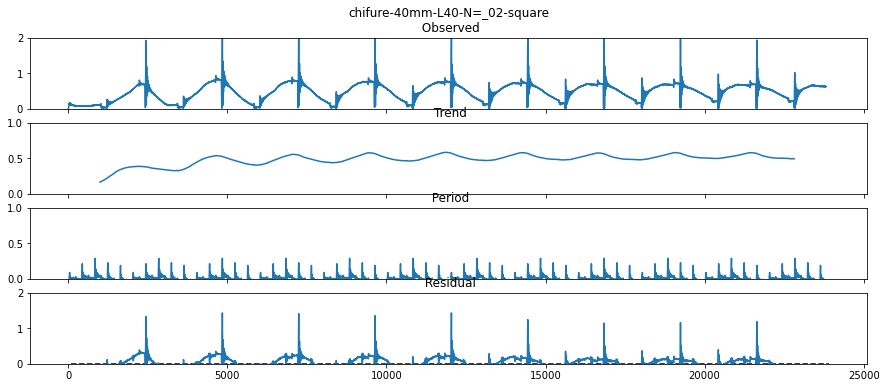

In [102]:
# creamA_40mmps_L40_N02
v_inst_creamA_40mmps_L40_N02.decompose_abs(v_range_dcp_square)

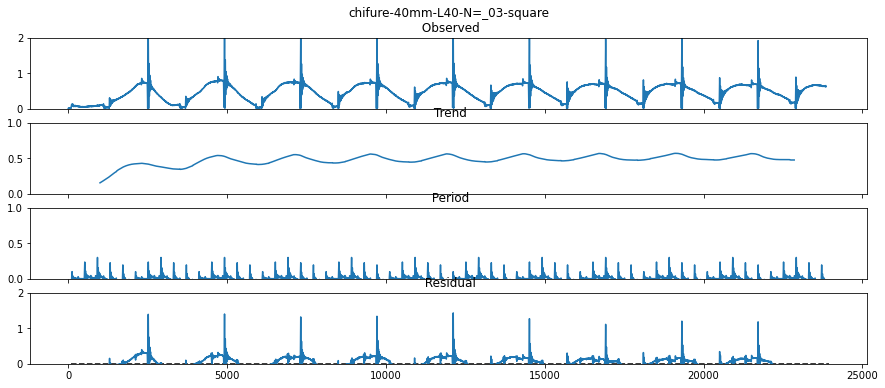

In [103]:
# creamA_40mmps_L40_N03
v_inst_creamA_40mmps_L40_N03.decompose_abs(v_range_dcp_square)

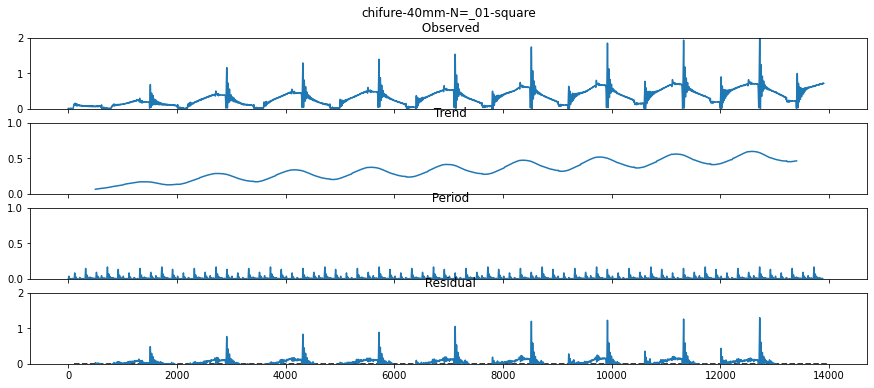

In [104]:
# creamA_40mmps_N01
v_inst_creamA_40mmps_N01.decompose_abs(v_range_dcp_square)

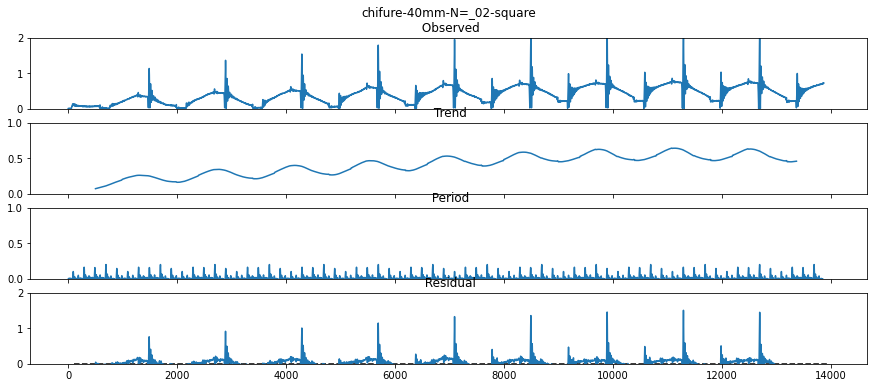

In [105]:
# creamA_40mmps_N02
v_inst_creamA_40mmps_N02.decompose_abs(v_range_dcp_square)

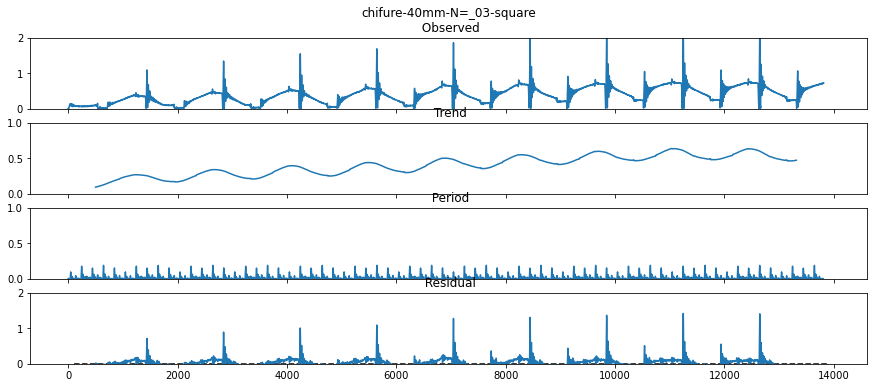

In [106]:
# creamA_40mmps_N03
v_inst_creamA_40mmps_N03.decompose_abs(v_range_dcp_square)

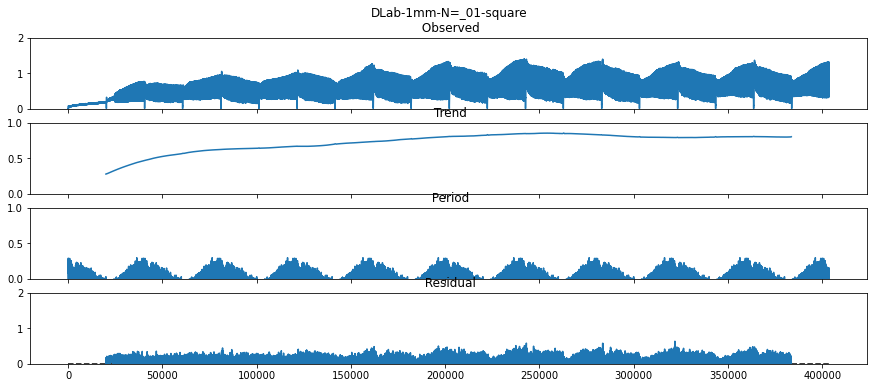

In [107]:
# creamB_1mmps_N01
v_inst_creamB_1mmps_N01.decompose_abs(v_range_dcp_square)

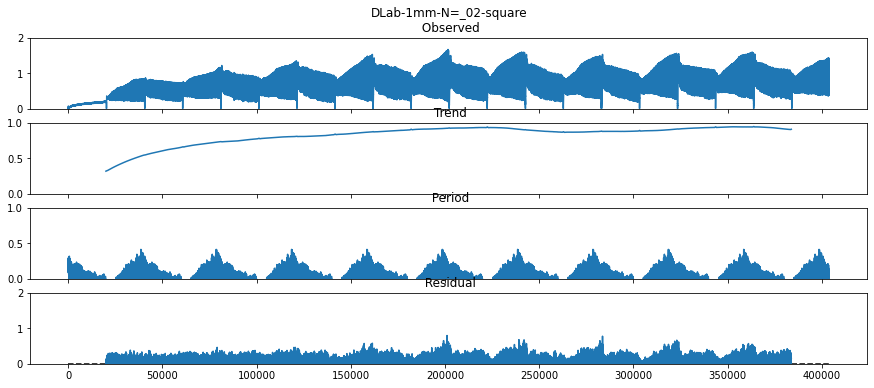

In [108]:
# creamB_1mmps_N02
v_inst_creamB_1mmps_N02.decompose_abs(v_range_dcp_square)

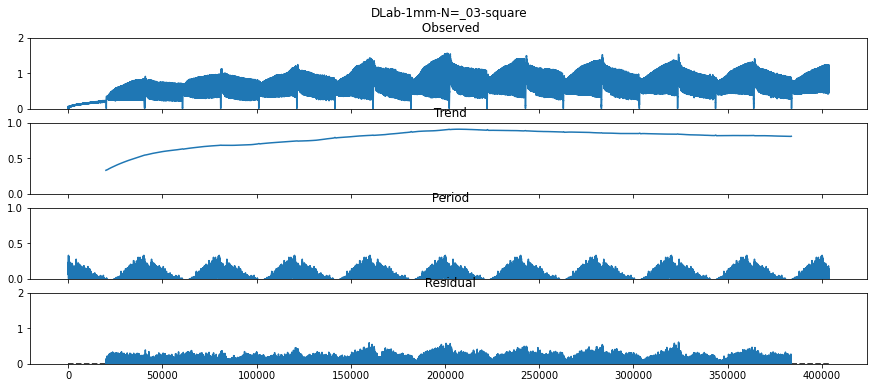

In [109]:
# creamB_1mmps_N03
v_inst_creamB_1mmps_N03.decompose_abs(v_range_dcp_square)

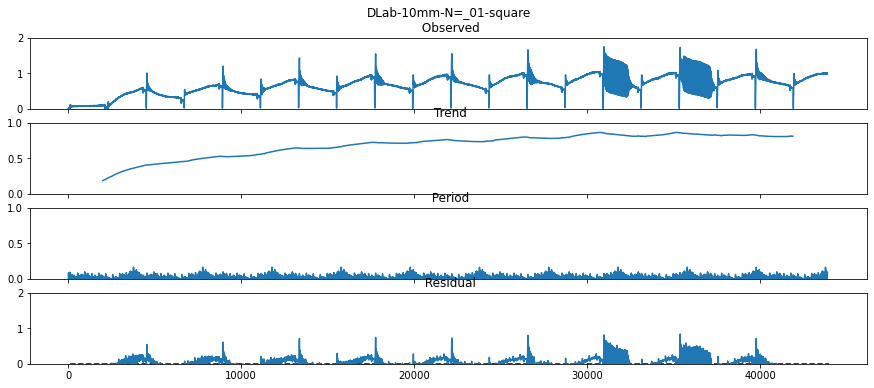

In [110]:
# creamB_10mmps_N01
v_inst_creamB_10mmps_N01.decompose_abs(v_range_dcp_square)

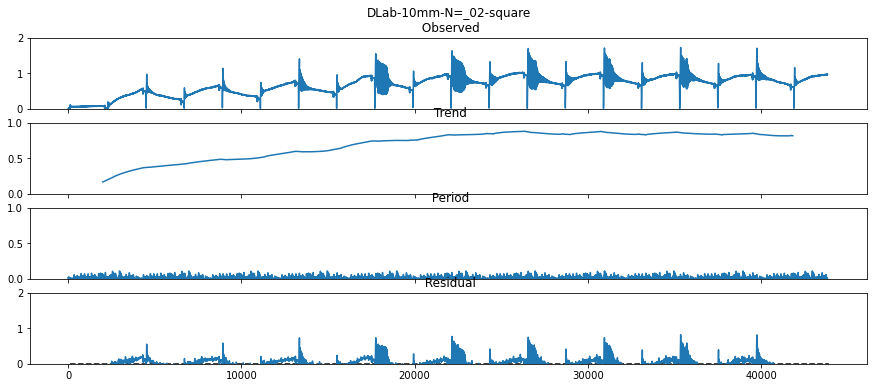

In [111]:
# creamB_10mmps_N02
v_inst_creamB_10mmps_N02.decompose_abs(v_range_dcp_square)

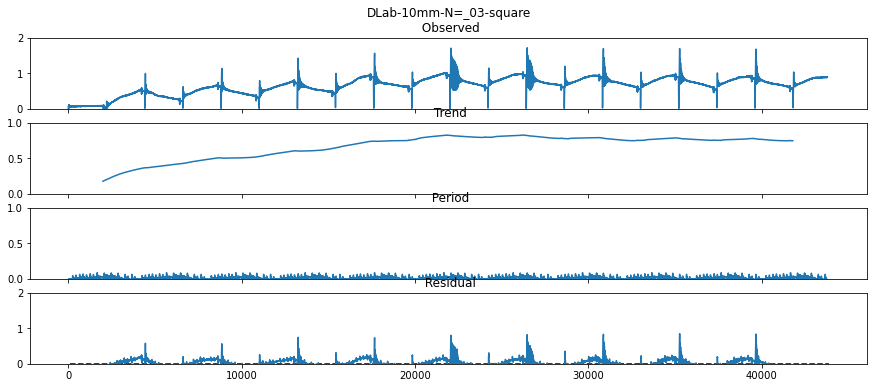

In [112]:
# creamB_10mmps_N03
v_inst_creamB_10mmps_N03.decompose_abs(v_range_dcp_square)

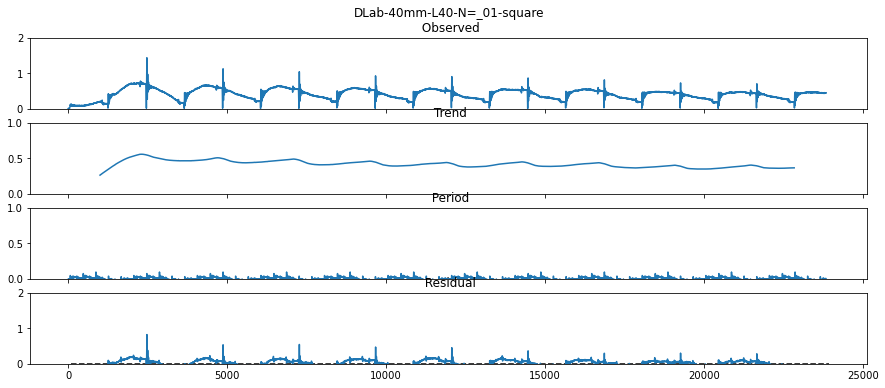

In [113]:
# creamB_40mmps_L40_N01
v_inst_creamB_40mmps_L40_N01.decompose_abs(v_range_dcp_square)

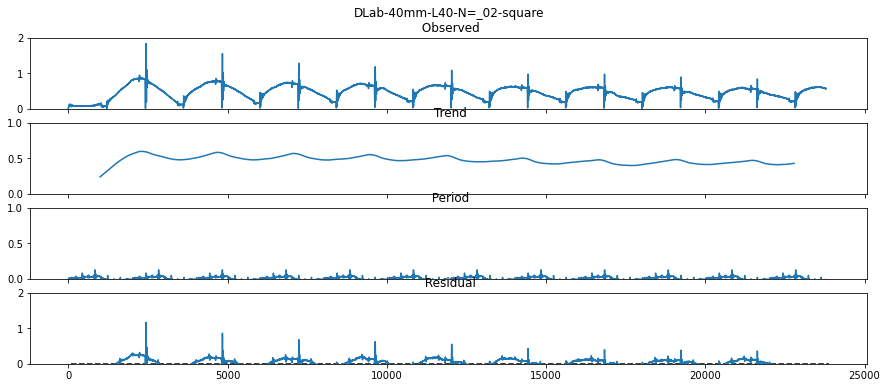

In [114]:
# creamB_40mmps_L40_N02
v_inst_creamB_40mmps_L40_N02.decompose_abs(v_range_dcp_square)

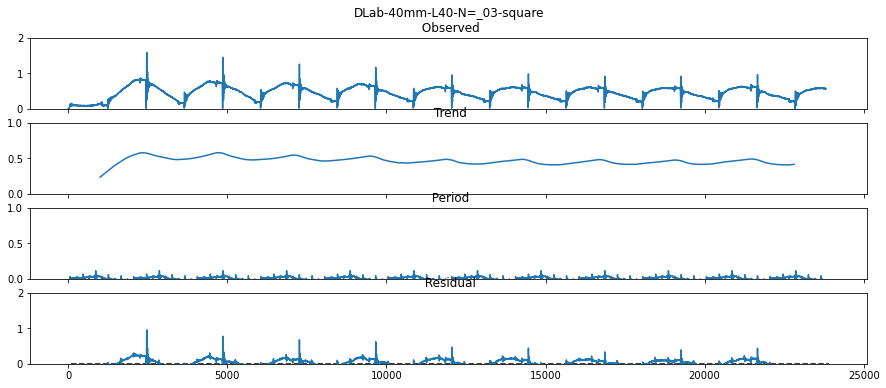

In [115]:
# creamB_40mmps_L40_N03
v_inst_creamB_40mmps_L40_N03.decompose_abs(v_range_dcp_square)

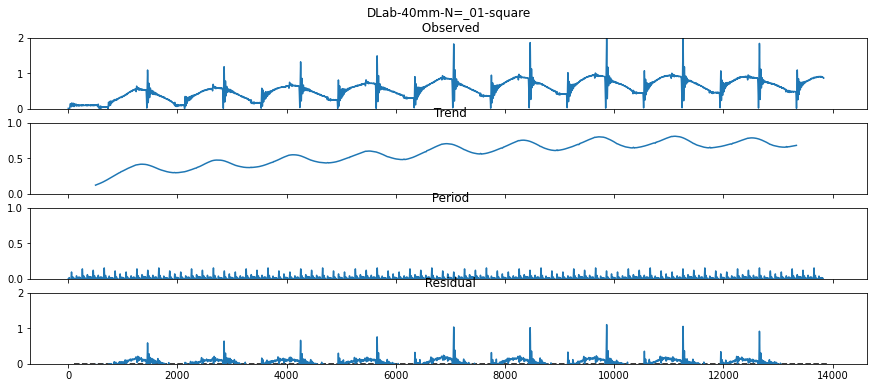

In [116]:
# creamB_40mmps_N01
v_inst_creamB_40mmps_N01.decompose_abs(v_range_dcp_square)

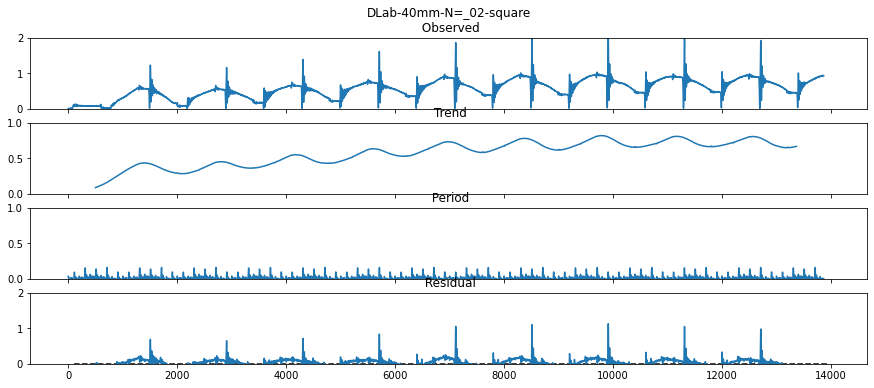

In [117]:
# creamB_40mmps_N02
v_inst_creamB_40mmps_N02.decompose_abs(v_range_dcp_square)

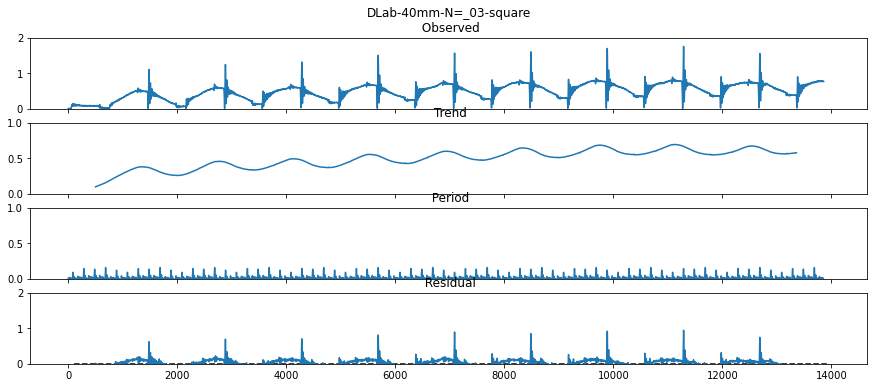

In [118]:
# creamB_40mmps_N03
v_inst_creamB_40mmps_N03.decompose_abs(v_range_dcp_square)

* 荷重，速度，片道のキョリ，サンプリングレート，リセット・スタート・ストップ時間は正しい？csvから自動で抜ける？
* 同じ条件でもsinと矩形で摩擦係数が大きく違う
* 矩形、chifure 1mmps のみN=1,2とN=3で傾向が違う、N=3だけノイズが小さい？
* chifureは往復で非対称性が大きい